# Data Science with Python - Class 9 & 10
By Kelechi Delight Ogbogu

## SUPERVISED LEARNING - CLASSIFICATION
Classification is a supervised learning technique that categorizes a data point into a specific class. According to Javatpoint, the classification algorithm is a Supervised Learning technique that is used to identifythe category of new observations on the basis of training data(https://www.javatpoint.com/classification-algorithm-in-machine-learning). This technique basically studies the relationship between predictors(independent variables) and a traget variable(dependent variable) and assigns class labels to new data points based on what it has learnt or observed.
Some common classification problems are:
- Classifying a mail as spam or not spam
- Classiying a transaction as fraudlent or non-fraudlent
- Classifying movies into different genres
- Heart Disease Detection etc.
#### TYPES OF CLASSIFICATION
1. **Binary Classification:** Binary Classification classifies data points into one of two classes, this means that there are only two class labels present in the data. eg Classiying a transaction as fraudlent or non-fraudlent, a mail as spam or not spam, a person as male or female. From the the example, you can see that there are only two possible classes.

2. **Multi-class Classification:** Multi-class Classification classifies data points into one of three or more classes. eg classifying a movie as Horror, Action, Romance or Comedy, classifying a flower as setosa, versicolor or virginica. 

Classification is similar to Regression because they both make predictions based on the relationship between the predictors and the target variable. However, the major difference between classification and regression is that in classification, the target variables are categorical values while in regression the target variables are continuous values.

**WHAT IS A CATEGORICAL VARIABLE?**
Categorical variables also known as qualitative variables are variables used to address how cases fit into groups. They are not measurement variables. According to Aptech, Categorical variables arise anytime observations fall into discrete groups rather than contionuous scale. Example are colour(red, blue, green, purple etc), Religion(Christianity, Islam, African Traditional religion etc), educational qualification(Bachelor, Master, PhD).

Categorical Variables are further divided into two:
1. **Nominal Variables:** These are categorical values with no intrinsic ordering.Eg There is no colour that can be considered higher than the other.
2. **Ordinal Variables:** These are categorical variables that takes values with an order or rank. Educational qualification can be considered ordinal variables, A doctorate degree is greater than Master's degree. 

**CLASSIFICATION ALGORITHMS**
- Logistic Regression
- Decision Tree
- Random Forest Classifier
- K Nearest Neighbour
- Support Vector Machine
- Naïve Bayes


Let's explore some of these classification algorithms by building a model that detects if an activity is fraudlent or not.

In [1]:
# importing the pandas library 
import pandas as pd

In [2]:
# Loading the csv data
bank_trans = pd.read_csv('bank transaction.csv')

In [3]:
# To view the top five rows of our data
bank_trans.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### EXPLORATORY ANALYSIS

In [4]:
# To check the number of rows and columns in our data
bank_trans.shape

(1296675, 23)

In [5]:
# To retrieve all column names
bank_trans.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
# To get a summary of our dataset
bank_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
# To get a statictical summary of our data
bank_trans.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [8]:
# To find the number of unique vaulues in our data
bank_trans.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [9]:
# To check for missing values
bank_trans.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
# To check for duplicate rows
bank_trans.duplicated().sum()

0

In [11]:
# To retrieve random 50 rows
bank_trans.sample(50)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1170813,1170813,2020-05-04 00:11:17,3590736522064285,fraud_Howe Ltd,misc_pos,5.15,Kimberly,Gonzalez,F,72966 Shannon Pass Apt. 391,...,34.5091,-92.4828,4074,"Scientist, audiological",1975-12-20,aa4e44e665f4a2d72fbc8758808eaced,1367626277,33.706423,-92.947653,0
864965,864965,2019-12-18 20:09:59,4481131401752,"fraud_Cremin, Hamill and Reichel",misc_pos,5.20,Frank,Foster,M,37910 Ward Lights,...,42.2848,-71.7205,35299,English as a second language teacher,1975-04-30,a02332c13f4b891f41a561636c783a95,1355861399,41.322194,-72.337077,0
333382,333382,2019-06-07 21:19:15,213120463918358,fraud_Ullrich Ltd,kids_pets,95.00,Willie,Jordan,M,529 West Key,...,32.9550,-92.5870,1758,"Psychologist, forensic",1957-08-08,e76753e7f8a586ac18a7bde6e678f60b,1339103955,32.550213,-91.942978,0
940656,940656,2020-01-10 20:52:08,30266994494236,fraud_Hammes-Beatty,kids_pets,27.96,Sarah,Foster,F,77872 Andrea Glen Apt. 543,...,37.1349,-77.7364,1051,Chief Operating Officer,1976-11-21,586a03e26b21478969e10e11b7ff149a,1357851128,37.767140,-77.006858,0
946194,946194,2020-01-13 09:23:04,630425673344,fraud_Bogisich Inc,grocery_pos,119.97,Bryan,Miller,M,411 Laurie Fords,...,38.3880,-79.9906,365,Special effects artist,1970-03-14,e0cf05c1d71e40b68dc32f1cf35b2f4f,1358068984,38.171670,-80.482108,0
486447,486447,2019-07-31 22:29:13,345832460465610,fraud_Erdman-Ebert,personal_care,43.81,Jason,Mcmahon,M,6385 Donald Square Suite 429,...,38.8029,-77.2116,104396,Production engineer,1950-11-20,cb753e753c60df4f454d1cd3b40b158e,1343773753,39.663733,-77.400742,0
515249,515249,2019-08-11 05:44:38,4839615922685395,fraud_Mayert Group,shopping_pos,1159.14,Phillip,Robertson,M,85344 Smith Gateway Apt. 280,...,39.0130,-86.5457,76,Social researcher,1955-05-06,ad60ae610d1774cd433f16bcc1c65270,1344663878,39.057783,-86.417584,0
1086544,1086544,2020-03-27 20:15:17,6011679934075347,"fraud_Schneider, Hayes and Nikolaus",food_dining,1.55,Jennifer,Gonzalez,F,5517 Stacy Land,...,41.0539,-106.0763,100,Public librarian,1974-04-16,258ca37838b99fc7f0d0fa60bbe0b1c1,1364415317,41.504726,-106.270284,0
1208569,1208569,2020-05-19 22:06:13,30118423745458,fraud_Turner and Sons,shopping_pos,1.82,Jared,Velazquez,M,01479 Murray Circle,...,40.4109,-74.2380,30770,Drilling engineer,1993-04-29,7ab06b760f051e7c5cd3951939a34400,1369001173,40.110769,-74.396180,0
512270,512270,2019-08-10 10:21:52,30175986190993,fraud_Pacocha-Bauch,shopping_pos,4.87,Rebecca,Butler,F,0665 Lisa Alley,...,47.5375,-95.9941,516,Applications developer,1966-06-07,c4bf24b048abbfab80d314de389e6f02,1344594112,47.451824,-95.126565,0


In [12]:
# To know the proportion fraudlent to non-fraudlent activity
fraud_prop = bank_trans.is_fraud.value_counts(normalize = True)
pd.DataFrame(fraud_prop)

,is_fraud
0,0.994211
1,0.005789


**Let's create a pie chart to better visualize the propotion of fraudlent to non-fraudlent activities**

In [13]:
# To import Data Visualization libraries
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

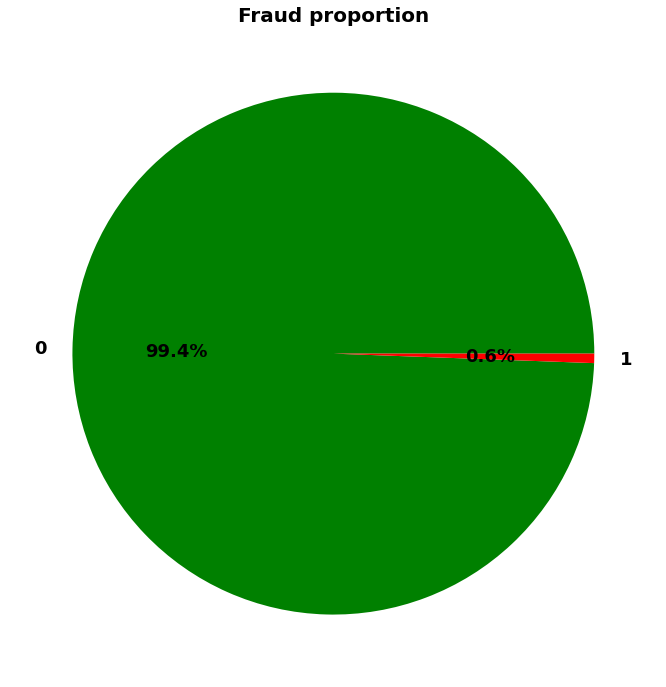

In [14]:
plt.figure(figsize=[20,12], facecolor='white')
plt.pie(fraud_prop, labels = fraud_prop.index, colors=['green', 'red'], textprops={'fontsize':'18', 'color':'black', 'fontweight':'bold'},autopct='%1.1f%%')
plt.title("Fraud proportion", fontsize=20, color="black", fontweight="bold" )
plt.show()

**The above step is an important step in building a classification model. It helps us understand if we have a balanced data or an imbalanced data. An imbalanced data or class imbalance occurs when one class is more frequent than the other(s).**

From the above line, we can see that we have a highly imbalanced data. While 99.4% of the transactions are non-fraudlent, only 0.6% are fraudlent. 

As a result of how imbalanced this data is, we cannot rely on the accuracy score for our model evaluation.

We would also need to pass the stratify parameter when spliting our data into a training and a test set.

In [15]:
# Let's visualize the relationship between our independent and dependent variables by plotting a heatmap
# importing the seaborn library for visaualization
import seaborn as sns

<AxesSubplot:>

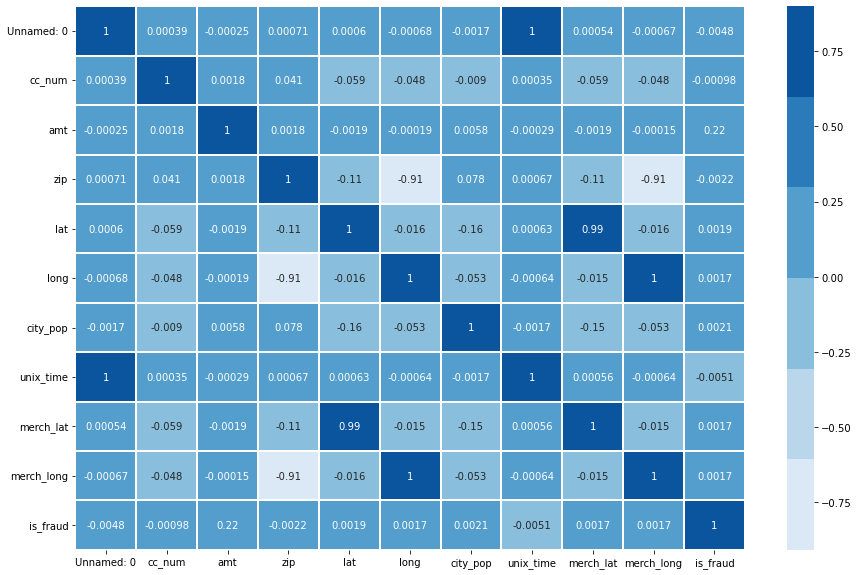

In [16]:
# To visualize the correlation matrix in a Heatmap
plt.figure(figsize=(15,10))
colormap = sns.color_palette("Blues")
sns.heatmap(bank_trans.corr(), cmap=colormap, vmax=0.9, annot=True, linecolor="white", linewidths=0.02)

### DATA PREPROCCESSING
This involves the various steps we take to convert our data to a format that will be usable and suitable for our model building.

In [17]:
# Dropping unnecessary features
bank_trans.drop(['Unnamed: 0', 'merchant', 'first', 'last', 'street', 'gender','lat', 'long', 'state','zip', 'city_pop', 'trans_num', 'unix_time','merch_lat', 'merch_long'], axis = 'columns', inplace = True)
bank_trans.head()

,trans_date_trans_time,cc_num,category,amt,city,job,dob,is_fraud
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,Moravian Falls,"Psychologist, counselling",1988-03-09,0
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,Orient,Special educational needs teacher,1978-06-21,0
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,Malad City,Nature conservation officer,1962-01-19,0
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,Boulder,Patent attorney,1967-01-12,0
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,Doe Hill,Dance movement psychotherapist,1986-03-28,0


#### FEATURE ENGINEERING
This is a step in data preprocessing, it involves creating new predictors from the existing ones. In this example, we are going to create new independent variables(transaction hour, day and month) from the transaction date column.

In [18]:
# Converting the date columns to datetime Data Type
from datetime import datetime
bank_trans.trans_date_trans_time = pd.to_datetime(bank_trans.trans_date_trans_time)
bank_trans.dob = pd.to_datetime(bank_trans.dob)

In [19]:
bank_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   category               1296675 non-null  object        
 3   amt                    1296675 non-null  float64       
 4   city                   1296675 non-null  object        
 5   job                    1296675 non-null  object        
 6   dob                    1296675 non-null  datetime64[ns]
 7   is_fraud               1296675 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 79.1+ MB


**The date columns are now converted to datetime data format. Now, we can perform some datetime functions.**

In [20]:
# Let's extract the transaction hour,month and date it will be relevant to our project
trans_hour = pd.DatetimeIndex(bank_trans.trans_date_trans_time).hour
trans_day = pd.DatetimeIndex(bank_trans.trans_date_trans_time).dayofweek + 1
trans_month = pd.DatetimeIndex(bank_trans.trans_date_trans_time).month

In [21]:
bank_trans.insert(1,'trans_hour',trans_hour)
bank_trans.insert(2,'trans_day',trans_day)
bank_trans.insert(3,'trans_month',trans_month)

In [22]:
bank_trans.head()

,trans_date_trans_time,trans_hour,trans_day,trans_month,cc_num,category,amt,city,job,dob,is_fraud
0,2019-01-01 00:00:18,0,2,1,2703186189652095,misc_net,4.97,Moravian Falls,"Psychologist, counselling",1988-03-09,0
1,2019-01-01 00:00:44,0,2,1,630423337322,grocery_pos,107.23,Orient,Special educational needs teacher,1978-06-21,0
2,2019-01-01 00:00:51,0,2,1,38859492057661,entertainment,220.11,Malad City,Nature conservation officer,1962-01-19,0
3,2019-01-01 00:01:16,0,2,1,3534093764340240,gas_transport,45.00,Boulder,Patent attorney,1967-01-12,0
4,2019-01-01 00:03:06,0,2,1,375534208663984,misc_pos,41.96,Doe Hill,Dance movement psychotherapist,1986-03-28,0


The three new independent variables have been added to our data. Let's go ahead to create another predictor(age) from the existing data of birth column.

In [23]:
# To find the age of customers using the dob column
customer_age = 2022 - pd.DatetimeIndex(bank_trans.dob).year

In [24]:
# inserting the customer age
bank_trans.insert(10,'customer_age',customer_age)

In [25]:
bank_trans.head()

,trans_date_trans_time,trans_hour,trans_day,trans_month,cc_num,category,amt,city,job,dob,customer_age,is_fraud
0,2019-01-01 00:00:18,0,2,1,2703186189652095,misc_net,4.97,Moravian Falls,"Psychologist, counselling",1988-03-09,34,0
1,2019-01-01 00:00:44,0,2,1,630423337322,grocery_pos,107.23,Orient,Special educational needs teacher,1978-06-21,44,0
2,2019-01-01 00:00:51,0,2,1,38859492057661,entertainment,220.11,Malad City,Nature conservation officer,1962-01-19,60,0
3,2019-01-01 00:01:16,0,2,1,3534093764340240,gas_transport,45.00,Boulder,Patent attorney,1967-01-12,55,0
4,2019-01-01 00:03:06,0,2,1,375534208663984,misc_pos,41.96,Doe Hill,Dance movement psychotherapist,1986-03-28,36,0


In [26]:
# Deleting the trans_date_trans_time and dob columns as we no longer need them
bank_trans.drop(['trans_date_trans_time', 'dob'], axis = 1, inplace = True)
bank_trans.head()

,trans_hour,trans_day,trans_month,cc_num,category,amt,city,job,customer_age,is_fraud
0,0,2,1,2703186189652095,misc_net,4.97,Moravian Falls,"Psychologist, counselling",34,0
1,0,2,1,630423337322,grocery_pos,107.23,Orient,Special educational needs teacher,44,0
2,0,2,1,38859492057661,entertainment,220.11,Malad City,Nature conservation officer,60,0
3,0,2,1,3534093764340240,gas_transport,45.00,Boulder,Patent attorney,55,0
4,0,2,1,375534208663984,misc_pos,41.96,Doe Hill,Dance movement psychotherapist,36,0


In [27]:
# Creating a new dataframe that will exclude the cc_num because I don't want to include it as one of my features
trans = bank_trans.drop(['cc_num'], axis = 1)

In [28]:
trans.shape

(1296675, 9)

#### OUTLIER DETECTION AND REMOVAL
We are going to check for outliers using the age column. We set our threshold as minimum age = 18 and maximum age = 100

In [29]:
# Using the describe function to check for outliers
trans.customer_age.describe()

count    1.296675e+06
mean     4.874255e+01
std      1.737848e+01
min      1.700000e+01
25%      3.500000e+01
50%      4.700000e+01
75%      6.000000e+01
max      9.800000e+01
Name: customer_age, dtype: float64

We can see that the minimum age is 17 years while the maximum age is 98 years. We are going to delete data points with customer age 17 because the expected minimum age is 17 years.
However, we need to retrieve and inspect these rows before deleting them from our data.

In [30]:
age_17 = trans.loc[trans['customer_age']== 17]
age_17

,trans_hour,trans_day,trans_month,category,amt,city,job,customer_age,is_fraud
247,3,2,1,grocery_net,22.08,Fulton,Facilities manager,17,0
815,10,2,1,gas_transport,62.32,Fulton,Facilities manager,17,0
1161,13,2,1,personal_care,7.91,Fulton,Facilities manager,17,0
1297,15,2,1,food_dining,7.62,Fulton,Facilities manager,17,0
3374,21,3,1,shopping_pos,134.07,Fulton,Facilities manager,17,0
...,...,...,...,...,...,...,...,...,...
1293655,9,6,6,gas_transport,50.71,Fulton,Facilities manager,17,0
1293872,12,6,6,health_fitness,43.93,Fulton,Facilities manager,17,0
1294633,18,6,6,health_fitness,59.78,Fulton,Facilities manager,17,0
1295500,1,7,6,grocery_net,20.38,Fulton,Facilities manager,17,0


In [31]:
age_17.sample(50)

,trans_hour,trans_day,trans_month,category,amt,city,job,customer_age,is_fraud
675723,19,1,10,personal_care,4.90,Fulton,Facilities manager,17,0
690740,14,1,10,misc_net,149.19,Fulton,Facilities manager,17,0
930596,20,6,1,entertainment,37.23,Fulton,Facilities manager,17,0
33198,19,7,1,entertainment,122.89,Fulton,Facilities manager,17,0
811464,9,6,12,grocery_net,47.05,Fulton,Facilities manager,17,0
774292,18,3,11,misc_pos,195.96,Fulton,Facilities manager,17,0
914573,20,7,12,food_dining,7.54,Fulton,Facilities manager,17,0
470001,11,5,7,grocery_net,53.76,Fulton,Facilities manager,17,0
109931,23,7,3,misc_net,98.02,Fulton,Facilities manager,17,0
383675,20,1,6,shopping_pos,108.85,Fulton,Facilities manager,17,0


In [32]:
age_17.job.unique()

array(['Facilities manager'], dtype=object)

It looks like these transations were done by one person. Let's confirm this using the data frame that has the cc_num. The cc_number column contains the credit card number that is unique to each user.

In [33]:
customer_age_17 = bank_trans.loc[trans['customer_age']== 17]
customer_age_17


,trans_hour,trans_day,trans_month,cc_num,category,amt,city,job,customer_age,is_fraud
247,3,2,1,36485887555770,grocery_net,22.08,Fulton,Facilities manager,17,0
815,10,2,1,36485887555770,gas_transport,62.32,Fulton,Facilities manager,17,0
1161,13,2,1,36485887555770,personal_care,7.91,Fulton,Facilities manager,17,0
1297,15,2,1,36485887555770,food_dining,7.62,Fulton,Facilities manager,17,0
3374,21,3,1,36485887555770,shopping_pos,134.07,Fulton,Facilities manager,17,0
...,...,...,...,...,...,...,...,...,...,...
1293655,9,6,6,36485887555770,gas_transport,50.71,Fulton,Facilities manager,17,0
1293872,12,6,6,36485887555770,health_fitness,43.93,Fulton,Facilities manager,17,0
1294633,18,6,6,36485887555770,health_fitness,59.78,Fulton,Facilities manager,17,0
1295500,1,7,6,36485887555770,grocery_net,20.38,Fulton,Facilities manager,17,0


In [34]:
customer_age_17.cc_num.unique()

array([36485887555770], dtype=int64)

We have now confirmed that transaction belongs to one person.  We can also see that this 17 year old is a Facilities Manager, this looks unreal and there is obviously something wrong with the data. Since we can't go back to our stakeholders, we will go ahead and drop these details.

In [35]:
trans_no_outliers = trans[~((trans.customer_age == 17))]
trans_no_outliers

,trans_hour,trans_day,trans_month,category,amt,city,job,customer_age,is_fraud
0,0,2,1,misc_net,4.97,Moravian Falls,"Psychologist, counselling",34,0
1,0,2,1,grocery_pos,107.23,Orient,Special educational needs teacher,44,0
2,0,2,1,entertainment,220.11,Malad City,Nature conservation officer,60,0
3,0,2,1,gas_transport,45.00,Boulder,Patent attorney,55,0
4,0,2,1,misc_pos,41.96,Doe Hill,Dance movement psychotherapist,36,0
...,...,...,...,...,...,...,...,...,...
1296670,12,7,6,entertainment,15.56,Hatch,Geoscientist,61,0
1296671,12,7,6,food_dining,51.70,Tuscarora,"Production assistant, television",43,0
1296672,12,7,6,food_dining,105.93,High Rolls Mountain Park,Naval architect,55,0
1296673,12,7,6,food_dining,74.90,Manderson,Volunteer coordinator,42,0


In [36]:
trans_no_outliers.nunique()

trans_hour         24
trans_day           7
trans_month        12
category           14
amt             52904
city              894
job               494
customer_age       80
is_fraud            2
dtype: int64

### HANDLING CATEGORICAL DATA
This is a must-do data preprocessing step for many machine learning algorithms. It involves converting categorical variables into numbers because many algorithms cannot work with labels/text data. 
There are many ways to do this in machine learning and each method has it's pros and cons.

Let's look at the various methods and choose the most favorable one for our data.
- **ONE HOT ENCODNIG:** This type of encoding creates a distinct column for each categorical variable and populates each column with zeros and ones. 0 indicates non existent while 1 indicates existent. As can imagine, one-hot encoding increases the dimension of the data by increasing the number of features in the dataset. This means that one-hot encoding will be a bad idea for encoding categorical columns with **HIGH CARDINALITY**(Columns with a high number of unique values). In our example, we can see that our categorical features(job and city) have a very large number of unique values. City has 894 unique values while job  has 494 unique values. Using One-Hot encodeing here will only increase the number of our feature by 1388 columns and 1386 after droping 1 column from each categorical data. Therefore, in order to avoid the curse of dimensionality, this method will not be our best choice. 


- **LABEL ENCODING:**  This type of encodinf assigns 0 to the max number of unique values in the categorical column minus 1. This means that if we have 10 unique values, the type of encoding will assign 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 to the unique values. The assignment is done in an alphabetical order. Assuming the unique values are blue, green, red, yellow, gold, purple, white, black, pink and orange. 0 will be assigned to Black, 1 to Blue, 2 to Gold, 3 to Green, 4 to Orange, 5 to Pink, 6 to Purple, 7 to Red, 8 to White, 9 to Yellow. The downside to Label Encoding is that the algorithm assigns an order or relationship to values. A colour like Gold will be considered higher than Black beacause 2 is greater than 0.  Now this makes no sense at all especiall considering that these values are nominal categorical values. This type of encoding is also not the best choice for our project.


- **FREQUENCY ENCODING:** Frequency or count encoding counts the number of times a data item appears in a columnn and assigns that number as the encoded value of the data item. eg. if we have a categorical columns that contains Lagos, Portharcourt, Lagos, Owerri, Lagos, Portharcourt, Abuja, Lagos and Abuja, Lagos will be encoded as 4 because it appears 4 times while Portharcourt will be encoded as 2. The problem with this encoding method arises when we have different data items with the same frequency distribution eg. Abuja appears twice as well, meaning that Abuja will be encoded as 2 as well as Portharcourt. This will make it difficult for us to spot the difference between both unique values.


- **TARGET ENCODING:** Target encoding encodes values by considering the target variables. According to Vinicius Trevisan, the main idea behind the target encoder is to encode the categories by replacing them for a measurement of the effect they might have the target. It counts the number of times that the target variable of a categorical value is 1 and divides it by the total number of times that categorical value occurs. This blog explains the target encoding method better https://maxhalford.github.io/blog/target-encoding/. 




**Let's adopt the target encoding method for our model**

In [37]:
#!pip install category_encoders

In [38]:
from category_encoders import TargetEncoder
columns = ['job', 'category', 'city']
target = 'is_fraud'
for column in columns:
    targetE = TargetEncoder()
    targetE.fit(X = trans_no_outliers[columns], y = trans_no_outliers[target])

C:\Users\Kelechi\anaconda3\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\Kelechi\anaconda3\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."
C:\Users\Kelechi\anaconda3\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\Kelechi\anaconda3\lib\site-packages\category_encoders\

In [39]:
transformed_values = targetE.transform(X = trans_no_outliers[columns], y = trans_no_outliers[target])
transformed_values

,job,category,city
0,0.001693,0.014480,0.000000
1,0.002157,0.014106,0.000000
2,0.015656,0.002484,0.000000
3,0.007905,0.004695,0.030426
4,0.000000,0.003131,0.000000
...,...,...,...
1296670,0.005338,0.002484,0.005948
1296671,0.015066,0.001655,0.015066
1296672,0.006103,0.001655,0.005314
1296673,0.003953,0.001655,0.003953


In [40]:
#Deleting the category and the job columns
trans_no_outliers.drop(['category', 'job', 'city'], axis = 1, inplace = True)
trans_no_outliers

C:\Users\Kelechi\AppData\Local\Temp\ipykernel_11648\888998571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trans_no_outliers.drop(['category', 'job', 'city'], axis = 1, inplace = True)


,trans_hour,trans_day,trans_month,amt,customer_age,is_fraud
0,0,2,1,4.97,34,0
1,0,2,1,107.23,44,0
2,0,2,1,220.11,60,0
3,0,2,1,45.00,55,0
4,0,2,1,41.96,36,0
...,...,...,...,...,...,...
1296670,12,7,6,15.56,61,0
1296671,12,7,6,51.70,43,0
1296672,12,7,6,105.93,55,0
1296673,12,7,6,74.90,42,0


In [41]:
# Merging the two tables
transaction = pd.concat([transformed_values, trans_no_outliers], axis = 1)
transaction

,job,category,city,trans_hour,trans_day,trans_month,amt,customer_age,is_fraud
0,0.001693,0.014480,0.000000,0,2,1,4.97,34,0
1,0.002157,0.014106,0.000000,0,2,1,107.23,44,0
2,0.015656,0.002484,0.000000,0,2,1,220.11,60,0
3,0.007905,0.004695,0.030426,0,2,1,45.00,55,0
4,0.000000,0.003131,0.000000,0,2,1,41.96,36,0
...,...,...,...,...,...,...,...,...,...
1296670,0.005338,0.002484,0.005948,12,7,6,15.56,61,0
1296671,0.015066,0.001655,0.015066,12,7,6,51.70,43,0
1296672,0.006103,0.001655,0.005314,12,7,6,105.93,55,0
1296673,0.003953,0.001655,0.003953,12,7,6,74.90,42,0


In [42]:
# separating the independent from the dependent variables
X = transaction.drop(['is_fraud'], axis = 1)
X

,job,category,city,trans_hour,trans_day,trans_month,amt,customer_age
0,0.001693,0.014480,0.000000,0,2,1,4.97,34
1,0.002157,0.014106,0.000000,0,2,1,107.23,44
2,0.015656,0.002484,0.000000,0,2,1,220.11,60
3,0.007905,0.004695,0.030426,0,2,1,45.00,55
4,0.000000,0.003131,0.000000,0,2,1,41.96,36
...,...,...,...,...,...,...,...,...
1296670,0.005338,0.002484,0.005948,12,7,6,15.56,61
1296671,0.015066,0.001655,0.015066,12,7,6,51.70,43
1296672,0.006103,0.001655,0.005314,12,7,6,105.93,55
1296673,0.003953,0.001655,0.003953,12,7,6,74.90,42


In [43]:
y = transaction['is_fraud']
y

0          0
1          0
2          0
3          0
4          0
          ..
1296670    0
1296671    0
1296672    0
1296673    0
1296674    0
Name: is_fraud, Length: 1294716, dtype: int64

In [44]:
# Let's scale our data before fitting, This process ensures that we do not get our scaled data in arrays but in a dataframe.
from sklearn.preprocessing import StandardScaler
# Create a scaler object
sc = StandardScaler()
X[['amt','customer_age','trans_hour','trans_day','trans_month']] = sc.fit_transform(X[['amt','customer_age','trans_hour','trans_day','trans_month']])
X

,job,category,city,trans_hour,trans_day,trans_month,amt,customer_age
0,0.001693,0.014480,0.000000,-1.877401,-0.941836,-1.504648,-0.407574,-0.852597
1,0.002157,0.014106,0.000000,-1.877401,-0.941836,-1.504648,0.229937,-0.276151
2,0.015656,0.002484,0.000000,-1.877401,-0.941836,-1.504648,0.933655,0.646163
3,0.007905,0.004695,0.030426,-1.877401,-0.941836,-1.504648,-0.158019,0.357940
4,0.000000,0.003131,0.000000,-1.877401,-0.941836,-1.504648,-0.176971,-0.737308
...,...,...,...,...,...,...,...,...
1296670,0.005338,0.002484,0.005948,-0.117527,1.332962,-0.041660,-0.341554,0.703808
1296671,0.015066,0.001655,0.015066,-0.117527,1.332962,-0.041660,-0.116249,-0.333796
1296672,0.006103,0.001655,0.005314,-0.117527,1.332962,-0.041660,0.221832,0.357940
1296673,0.003953,0.001655,0.003953,-0.117527,1.332962,-0.041660,0.028384,-0.391440


In [45]:
# To create the train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100, stratify = y)

In [46]:
X_train

,job,category,city,trans_hour,trans_day,trans_month,amt,customer_age
114797,0.004322,0.017567,0.005366,-1.584088,-0.486876,-0.919453,-0.340370,2.202568
285536,0.000000,0.002484,0.000000,0.175786,-1.396795,-0.334258,-0.408447,-1.140820
632906,0.022358,0.002868,0.022358,0.175786,-0.031917,0.836132,-0.377712,0.588519
572841,0.002810,0.007226,0.006103,0.615754,0.878002,0.543535,1.001732,-1.486688
499386,0.010982,0.014106,0.007744,-1.144120,-1.396795,0.543535,0.099267,0.242651
...,...,...,...,...,...,...,...,...
228732,0.008412,0.007226,0.005954,1.202379,-0.031917,-0.626855,-0.412562,-0.737308
584082,0.002727,0.001609,0.000000,0.909067,-0.486876,0.836132,0.044780,-0.506729
114589,0.003269,0.002428,0.000000,1.495691,-0.941836,-0.919453,-0.167993,-0.967886
876703,0.004545,0.002428,0.004545,0.762411,0.878002,1.713925,-0.355768,-0.045572


In [47]:
X_test

,job,category,city,trans_hour,trans_day,trans_month,amt,customer_age
672142,0.011550,0.001609,0.011550,0.469098,1.332962,1.128730,-0.054718,1.914345
505128,0.010654,0.004695,0.007129,-0.410839,-0.486876,0.543535,0.327689,1.453188
702449,0.005028,0.014106,0.004921,-1.290776,1.332962,1.128730,0.342963,1.107320
63243,0.000000,0.001655,0.002569,1.202379,-0.486876,-1.212050,-0.238440,0.127362
748565,0.006878,0.002484,0.000000,0.615754,0.878002,1.421327,-0.110452,-0.852597
...,...,...,...,...,...,...,...,...
702772,0.006103,0.014106,0.006997,-0.850808,1.332962,1.128730,0.458857,1.626122
818574,0.003373,0.002868,0.006980,0.175786,1.332962,1.713925,0.927795,-0.333796
652687,0.003278,0.001609,0.000000,-0.117527,0.878002,1.128730,-0.394981,1.280254
217487,0.005532,0.002484,0.000000,1.349035,0.878002,-0.626855,-0.032711,-1.140820


### MODEL TRAINING( Logistic Regression)

In [48]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [49]:
log_pred = log_reg.predict(X_test)

### MODEL EVALUATION
Accuracy score is one of the common model evaluation metrics to measure the performance of classification algorithms. Accuracy classifier is defined as the fraction of correct predictions(the number of correct predictions divided by the total number of observations). Though accuracy metric is very easy to implement, it is not always a useful metric especially when measuring the performance for an imbalanced data.

In [50]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [51]:
accuracy = accuracy_score(y_test, log_pred)
accuracy

0.9942690163871117

We can see that the accuracy score has evaluated our model to be 99.4% accurate but let's take a closer look using the confusion matrix.

A confusion matrix compares the actual values against the preedicted values. It returns a matrix of True Negative, False Negative, False Positive and True Positive.

True Negative: These are observations that are negative and are correctly predicted as negative. 386001 represents the number of True Negative.

False Negative: Are positive observations that are wrongly predicted as negative. In our example 164 represents the number of False Negative.

False Positive: These are negative observations wrongly predicted as positive.  2062 represents the number of False Positive.

True Positive: Are positive observations that are correctly predicted as positive. In our example 188 represents the number of True Positive.

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, log_pred)
cm

array([[386001,    164],
       [  2062,    188]], dtype=int64)

In [73]:
#Let's compute the classification report
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    386165
           1       0.53      0.08      0.14      2250

    accuracy                           0.99    388415
   macro avg       0.76      0.54      0.57    388415
weighted avg       0.99      0.99      0.99    388415



**To better visualize it in a Heatmap**

Text(15.0, 0.5, 'Actual Values')

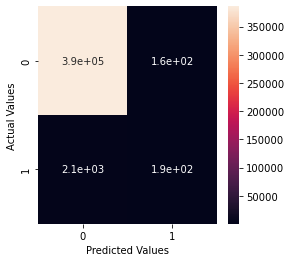

In [54]:
import seaborn as sns
#plotting the confusion metrics
plt.figure(figsize =(4, 4))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

The confusion matrix shows that the model did a terrible job at predicting fraudlent activites. Out of 2250 fraudlent activities, the model was able to capture just 188. This is not a good model, let's try other Classifiers.

### MODEL TRAINING( Random Forest Classifier) 

In [55]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(class_weight = 'balanced')
rand_forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [56]:
# To predict using RandomForest
rand_pred = rand_forest.predict(X_test)

In [57]:
# To evaluate the RandomForest model
rand_cm = confusion_matrix(y_test, rand_pred)
rand_cm

array([[386109,     56],
       [   497,   1753]], dtype=int64)

In [72]:
print(classification_report(y_test, rand_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386165
           1       0.97      0.78      0.86      2250

    accuracy                           1.00    388415
   macro avg       0.98      0.89      0.93    388415
weighted avg       1.00      1.00      1.00    388415



Text(15.0, 0.5, 'Actual Values')

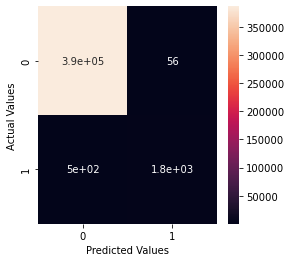

In [58]:
#plotting the confusion matrix
plt.figure(figsize =(4, 4))
sns.heatmap(rand_cm, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

### MODEL TRAINING( XG Boost Classifier) 

In [60]:
from xgboost import XGBClassifier
XGBoost = XGBClassifier()
XGBoost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [61]:
# To predict using XGboost
xg_pred = XGBoost.predict(X_test)

In [62]:
# To evaluate the XGB model
xg_cm = confusion_matrix(y_test, xg_pred)
xg_cm

array([[386063,    102],
       [   362,   1888]], dtype=int64)

In [70]:
print(classification_report(y_test, xg_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386165
           1       0.95      0.84      0.89      2250

    accuracy                           1.00    388415
   macro avg       0.97      0.92      0.94    388415
weighted avg       1.00      1.00      1.00    388415



Text(15.0, 0.5, 'Actual Values')

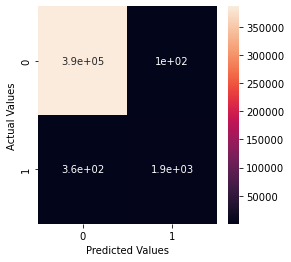

In [64]:
#plotting the confusion metrics
plt.figure(figsize =(4, 4))
sns.heatmap(xg_cm, annot = True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

### MODEL TRAINING( K-Nearest Neighbour Classifier) 

In [65]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [67]:
# To predict using K Nearest Neighbor
knn_pred = knn.predict(X_test)

In [68]:
knn_cm = confusion_matrix(y_test, knn_pred)
knn_cm

array([[385859,    306],
       [  1103,   1147]], dtype=int64)

In [71]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386165
           1       0.79      0.51      0.62      2250

    accuracy                           1.00    388415
   macro avg       0.89      0.75      0.81    388415
weighted avg       1.00      1.00      1.00    388415



We can see that XGB classifier did the best job at detecting fraudlent activities.

##### IMPORTANT LINKS:
https://www.edureka.co/blog/classification-in-machine-learning/

https://machinelearningmastery.com/types-of-classification-in-machine-learning/

https://www.analyticsvidhya.com/blog/2021/09/a-complete-guide-to-understand-classification-in-machine-learning/

https://maxhalford.github.io/blog/target-encoding/

https://youtu.be/MPnNC6kkNC4

https://towardsdatascience.com/dealing-with-categorical-variables-by-using-target-encoder-a0f1733a4c69

https://youtu.be/zM4VZR0px8E

https://youtu.be/PHxYNGo8NcI

https://youtu.be/CQveSaMyEwM

https://youtu.be/ok2s1vV9XW0

https://youtu.be/ZVR2Way4nwQ

https://youtu.be/C64-LmjRwIQ
